In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("../df_cleaned.csv")


y = df["BRCAstatesNew"]
X = df.drop(["BRCAstatesNew"], axis =1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
!pip install xgboost

In [11]:
from xgboost import XGBClassifier

In [12]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [71]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred =xgb_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.9989969909729187

In [27]:
xgb = XGBClassifier()

In [29]:
xgb_params = {"n_estimators": [100,500],
             "subsample": [0.6,1],
             "max_depth": [3,7],
             "learning_rate": [0.1, 0.01]}

In [42]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, n_jobs = -1).fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
16 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
    

In [46]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

In [48]:
xgb_tuned = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators= 100, subsample= 0.6).fit(X_train, y_train)

In [50]:
y_pred = xgb_tuned.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.9989969909729187

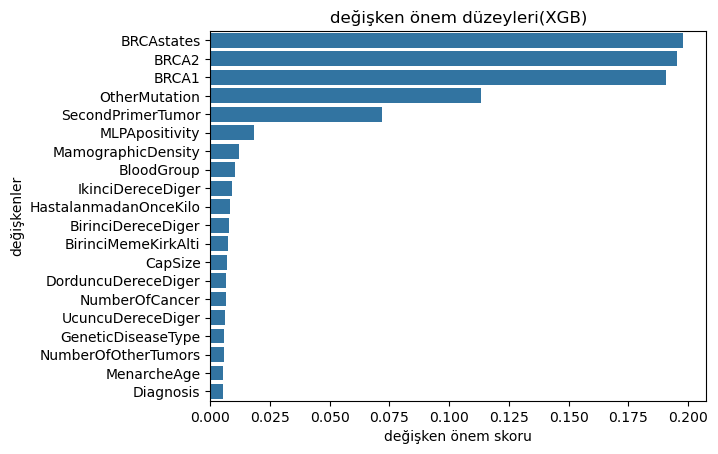

In [76]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("değişken önem skoru")
plt.ylabel("değişkenler")
plt.title("değişken önem düzeyleri(XGB)")
plt.show()